# TP N° 1: Análisis Exploratorio de Datos
## Heart Diseases Dataset
Este conjunto de datos es una versión avanzada del clásico conjunto de datos de enfermedades cardíacas de UCI Machine Learning, enriquecido con más características para soportar análisis más sofisticados.

## 1- Listado de variables y selección 

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import PIL
import seaborn as sns
import plotly
import sklearn_pandas
import plotly.express as px

In [311]:
data = pd.read_csv('./heart_disease_data_with_features.csv')

In [312]:
data.shape
# Muestra las dimensiones del dataframe

(303, 36)

In [313]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782
5,56,1,2,120,236,0,0,178,0,0.8,...,1.950413,0.948670,-0.435528,247.424000,-58,-2.034400,13216,2566.048,6720,15.308770
6,62,0,4,140,268,0,2,160,0,3.6,...,1.900709,0.908251,2.485868,260.024691,-108,9.567901,16616,2882.560,8680,14.093395
7,57,0,4,120,354,0,0,163,1,0.6,...,2.925620,0.868488,-0.252941,247.424000,-191,-1.234400,20178,3484.614,6840,15.819108
8,63,1,4,130,254,0,2,147,0,1.4,...,1.938931,0.901818,0.477408,260.024691,-107,0.767901,16002,2543.394,8190,13.878265
9,53,1,4,140,203,1,2,155,1,3.1,...,1.439716,0.949557,2.029400,247.424000,-48,8.765600,10759,1884.645,7420,15.426704


In [314]:
# Dividimos por las columnas de interes
subset = data.loc[:, ['sex','cp','fbs','restecg','thalach', 'exang','oldpeak','slope', 'ca','thal', 'num','age_group', 'cholesterol_level', 'bp_level','risk_score', 'symptom_severity', 'risk_factor', 'avg_chol_by_age_group']]
subset.describe()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000,303.000000,303.000000,301.000000,302.000000
mean,0.679868,3.158416,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294,14.844073,3.508251,19.733887,246.834437
std,0.467299,0.960126,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536,4.073047,4.381467,28.421998,10.493973
min,0.000000,1.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,7.216000,0.000000,0.000000,219.785714
25%,0.000000,3.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,12.080000,0.000000,0.000000,235.847222
50%,1.000000,3.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,14.392000,1.800000,7.200000,247.424000
75%,1.000000,4.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,17.181000,5.500000,28.800000,260.024691
max,1.000000,4.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,38.938000,24.800000,173.600000,260.024691


In [315]:
subset.head(10)

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
0,1,1,1,2,150,0,2.3,3,0.0,6.0,0,60s,normal,high,16.129,2.3,13.8,260.024691
1,1,4,0,2,108,1,1.5,2,3.0,3.0,2,60s,high,high,20.762,6.0,18.0,260.024691
2,1,4,0,2,129,1,2.6,2,2.0,7.0,1,60s,normal,low,16.543,10.4,72.8,260.024691
3,1,3,0,0,187,0,3.5,3,0.0,3.0,0,30s,high,normal,10.550,10.5,31.5,219.785714
4,0,2,0,2,172,0,1.4,1,0.0,3.0,0,40s,normal,normal,9.664,2.8,8.4,235.847222
5,1,2,0,0,178,0,0.8,1,0.0,3.0,0,50s,normal,low,14.416,1.6,4.8,247.424000
6,0,4,0,2,160,0,3.6,3,2.0,3.0,3,60s,high,normal,18.016,14.4,43.2,260.024691
7,0,4,0,0,163,1,0.6,1,0.0,3.0,0,50s,high,low,21.378,2.4,7.2,247.424000
8,1,4,0,2,147,0,1.4,2,1.0,7.0,2,60s,high,normal,17.302,5.6,39.2,260.024691
9,1,4,1,2,155,1,3.1,3,0.0,7.0,1,50s,normal,normal,12.159,12.4,86.8,247.424000


In [316]:
# Mostramos los tipos de datos
subset.dtypes

sex                        int64
cp                         int64
fbs                        int64
restecg                    int64
thalach                    int64
exang                      int64
oldpeak                  float64
slope                      int64
ca                       float64
thal                     float64
num                        int64
age_group                 object
cholesterol_level         object
bp_level                  object
risk_score               float64
symptom_severity         float64
risk_factor              float64
avg_chol_by_age_group    float64
dtype: object

In [317]:
# Elije 10 filas al azar del DataFrame
subset.sample(10)

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
28,1,4,0,0,171,0,1.5,1,0.0,3.0,0,40s,high,high,12.121,6.0,18.0,235.847222
195,1,4,0,2,125,1,0.9,2,2.0,3.0,3,60s,high,low,21.033,3.6,10.8,260.024691
283,1,2,0,0,174,0,0.0,1,0.0,3.0,0,30s,low,normal,7.940,0.0,0.0,219.785714
169,0,2,0,0,138,0,0.0,2,0.0,3.0,0,40s,low,low,8.320,0.0,0.0,235.847222
201,0,4,0,0,154,1,0.0,1,0.0,3.0,0,60s,high,high,22.600,0.0,0.0,260.024691
251,1,4,0,0,105,0,2.0,2,1.0,7.0,1,50s,normal,high,14.104,8.0,56.0,247.424000
248,1,4,0,0,168,0,1.0,1,2.0,7.0,3,50s,normal,normal,12.274,4.0,28.0,247.424000
45,1,3,0,2,165,0,2.5,2,1.0,7.0,4,50s,normal,low,14.460,7.5,52.5,247.424000
93,0,3,0,0,175,0,0.6,2,0.0,3.0,0,40s,low,low,7.284,1.8,5.4,235.847222
208,1,2,0,0,155,0,0.0,1,0.0,3.0,0,50s,high,normal,15.710,0.0,0.0,247.424000


In [318]:
fig = px.box(subset, y='thalach', )
fig.show()

Analizando la variable "thalach" podemos ver que uno de los registros que tiene es atípico. Este registro va a ser eliminado porque puede perjudicar el modelo. 

In [319]:
result = subset[subset['thalach'] == 71]
result.head()

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
245,1,4,0,0,71,0,1.0,2,0.0,3.0,2,60s,normal,low,17.079,4.0,12.0,260.024691


In [320]:
subset = subset.drop(index=245)

In [321]:
fig = px.box(subset, y='thalach', )
fig.show()

Con el gráfico en barras podemos deducir que en la mayoria de datos del subconjunto es 0, es decir, que no se detectaron enfermedades. Y luego la cantidad de casos donde se empieza a detectar enfermedades se encuentran escalonadas, yendo desde el 1 (enfermedad leve) hasta 4 (enfermedad grave).

## 2- Análisis detallado de un conjunto de variables

### Variables Nulos
Estos son los valores nulos encontrados en el subset de datos:

In [322]:
subset.isnull().sum()

sex                      0
cp                       0
fbs                      0
restecg                  0
thalach                  0
exang                    0
oldpeak                  0
slope                    0
ca                       4
thal                     2
num                      0
age_group                1
cholesterol_level        1
bp_level                 2
risk_score               0
symptom_severity         0
risk_factor              2
avg_chol_by_age_group    1
dtype: int64

#### Tratamiento de valores nulos

**Variables:**
- **ca: numerica**
- **thal: numerica**
- **age_group: cualitativa**
- **cholesterol_level: cualitativa**
- **bp_level: cualitativa**
- **risk_factor: numerica**
- **avg_chol_by_age_group: numerica**

Para las variables numericas, el tratamiento que llevaremos a cabo sera rellenar con la media


Para las variables cualitativas, el tratamiento será rellenar con el valor que mas se repite

#### tratamiento de valores nulos de 'ca'

In [323]:
subset['ca'] = subset['ca'].fillna(subset['ca'].mean())
subset['ca'].isnull().sum()

np.int64(0)

#### tratamiento de valores nulos de 'thal'

In [324]:
subset[subset['thal'].isna()]

,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_group,cholesterol_level,bp_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
87,0,3,0,2,115,0,0.0,1,0.0,NaN,0,50s,normal,normal,12.728,0.0,NaN,247.424
266,1,4,1,0,156,1,1.0,2,0.0,NaN,2,50s,normal,normal,11.888,4.0,NaN,247.424


In [325]:
subset['thal'] = subset['thal'].fillna(subset['thal'].mean())
subset['thal'].isnull().sum()

np.int64(0)

#### tratamiento de valores nulos de 'age_group'

In [326]:
subset['age_group'] = subset['age_group'].fillna(subset['age_group'].mode()[0])
subset['age_group'].isnull().sum()

np.int64(0)

#### tratamiento de valores nulos de 'cholesterol level'

In [327]:
subset[subset['cholesterol_level'].isna()]
subset['cholesterol_level'] = subset['cholesterol_level'].fillna(subset['cholesterol_level'].mode()[0])
subset['cholesterol_level'].isnull().sum()

np.int64(0)

#### tratamiento de valores nulos de 'bp_level'

In [328]:
subset['bp_level'] = subset['bp_level'].fillna(subset['bp_level'].mode()[0])
subset['bp_level'].isnull().sum()

np.int64(0)

#### tratamiento de valores nulos de 'risk_factor'

In [329]:
subset['risk_factor'] = subset['risk_factor'].fillna(subset['risk_factor'].mean())
subset['risk_factor'].isnull().sum()

np.int64(0)

#### tratamiento de valores nulos de 'avg_chol_by_age_group'

In [330]:
subset['avg_chol_by_age_group'] = subset['avg_chol_by_age_group'].fillna(subset['avg_chol_by_age_group'].mean())
subset['avg_chol_by_age_group'].isnull().sum()

np.int64(0)

In [331]:
# ESTO PUEDE JUNTARSE EN DOS CELDAS, UNA CON LAS NUMERICAS Y OTRA CON LAS CUALITATIVAS

### Variable de salida
**num** 

<Axes: title={'center': 'num'}, xlabel='num'>

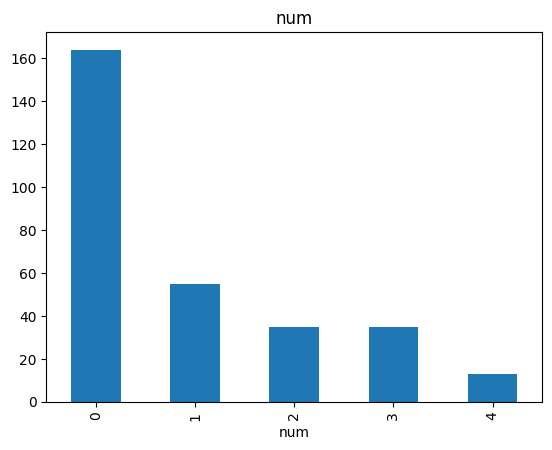

In [332]:
subset.num.value_counts().plot.bar(title='num')

In [333]:
subset.num.value_counts()

num
0    164
1     55
2     35
3     35
4     13
Name: count, dtype: int64

In [334]:
len(subset)

302

Podemos observar en el grafico que de la variable **num** se encuentra dividida en los siguientes porcentajes:
- **0 - 55,21%**
- **1 - 18.51%**
- **2 - 11.78%**
- **3 - 11.78%**
- **4 - 4.37%**

Esto nos indica que el 55% de las personas no se detectaron enfermedades cardiacas, y el resto, el 45% indica que hay enfermedad cardiaca entre sus diferentes gravedades. Esto nos muestra que hay una tendencia en la cual mientras más grave sea la enfermedad cardiaca, menor es la cantidad de personas hay.

In [335]:
mean = subset['num'].mean()

std_dev = subset['num'].std()

print(f"Media: {mean}")
print(f"Desviación estándar: {std_dev}")

Media: 0.9337748344370861
Desviación estándar: 1.2290442721424581


**Interpretación de la Media:**
Es 0.9337, lo que indica que el valor promedio de la variable es cercano a 1. Esto sugiere que la mayoría de los datos están en los valores más bajos (0 y 1), con algunos valores más altos contribuyendo a elevarla ligeramente.

**Interpretación de la Desviación Estándar:**
Es 1.229, lo que nos indica cuánto se desvían los datos de la media, en promedio. Es relativamente alta en comparación con la media, lo que sugiere que hay una considerable variabilidad en los datos con una distribución sesgada hacia los valores más bajos (cercanos a 0). Esto es consistente con una distribución en la que hay pocos datos con valores altos (3 o 4), lo cual tiene sentido, dado que es más complejo tener mayor cantidad de registros de pacientes con mayor gravedad.

### Variables de entrada

Para trabajar de una manera mas entendible en el trabajo decidimos renombrar las mismas.

In [336]:
BETTER_COLUMN_NAMES = {
    'sex': 'sex',
    'cp': 'chest_pain',
    'fbs':'fasting_blood_sugar',
    'restecg':'rest_ecg',
    'thalach':'max_heart_rate',
    'exang':'exercise_induced_angina',
    'oldpeak':'depression_induced_ex',
    'slope':'slope',
    'ca':'vessels_colored_fl',
    'thal':'thalassemia',
    'num':'diagnosis',
    'age_group':'age_group',
    'cholesterol_level':'cholesterol_level',
    'bp_level':'blood_pressure_level',
    'risk_score':'risk_score',
    'symptom_severity':'symptom_severity',
    'risk_factor':'risk_factor',
    'avg_chol_by_age_group':'avg_chol_by_age_group'
}

subset.rename(columns=BETTER_COLUMN_NAMES, inplace=True)

subset

,sex,chest_pain,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,depression_induced_ex,slope,vessels_colored_fl,thalassemia,diagnosis,age_group,cholesterol_level,blood_pressure_level,risk_score,symptom_severity,risk_factor,avg_chol_by_age_group
0,1,1,1,2,150,0,2.3,3,0.000000,6.0,0,60s,normal,high,16.129,2.3,13.8,260.024691
1,1,4,0,2,108,1,1.5,2,3.000000,3.0,2,60s,high,high,20.762,6.0,18.0,260.024691
2,1,4,0,2,129,1,2.6,2,2.000000,7.0,1,60s,normal,low,16.543,10.4,72.8,260.024691
3,1,3,0,0,187,0,3.5,3,0.000000,3.0,0,30s,high,normal,10.550,10.5,31.5,219.785714
4,0,2,0,2,172,0,1.4,1,0.000000,3.0,0,40s,normal,normal,9.664,2.8,8.4,235.847222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,0,0,132,0,1.2,2,0.000000,7.0,1,40s,high,low,12.980,1.2,8.4,235.847222
299,1,4,1,0,141,0,3.4,2,2.000000,7.0,2,60s,low,high,14.564,13.6,95.2,260.024691
300,1,4,0,0,115,1,1.2,2,1.000000,7.0,3,50s,low,normal,8.767,4.8,33.6,247.424000
301,0,2,0,2,174,0,0.0,2,1.000000,3.0,1,50s,normal,normal,14.752,0.0,0.0,247.424000


**sex**

In [337]:
subset.sex.value_counts()

sex
1    205
0     97
Name: count, dtype: int64

<Axes: title={'center': 'Sex (1: Hombre 0: Mujer)'}, xlabel='sex'>

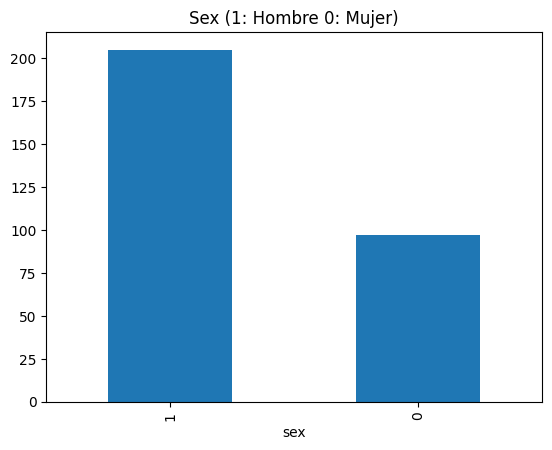

In [338]:
subset.sex.value_counts().plot.bar(title='Sex (1: Hombre 0: Mujer)')

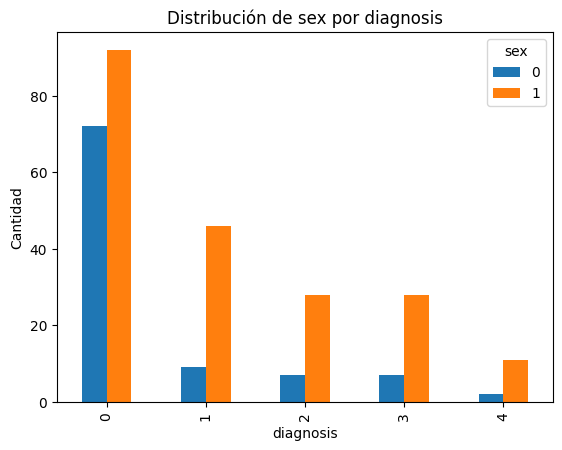

In [339]:
grouped_data = subset.groupby(['diagnosis', 'sex']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', title='Distribución de sex por diagnosis')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

Hay que considerar que los registros de **sex** se encuentra desbalaceados, siendo la cantidad de hombres en los registros de un **69.02%** y de las mujeres el **32.65%**, por lo que es evidente que el gráfico indique que los hombres son más propensos a contraer una enfermedad cardiaca. 

**Depression_induced_ex**

In [340]:
fig = px.box(subset, y='depression_induced_ex')
fig.show()

La variable representa la depresión inducida por el ejercicio en relación al reposo, lo que quiere decir que cuanto mas cercano a 0 sea mejor. Esto es así porque un corazón sano no debería esforzarse tanto para hacer ejercicio. 

Podemos observar en el gráfico que, el 50% del total de los datos se encuentran entre 0 y 1,6. 

Pero también podemos observar que hay valores aberrantes. A los mismos procedemos a dejarlos por las dudas, dado que el ámbito en el cual estamos trabajando es analizar que tan enferma está una persona del corazón, y estos casos aislados pueden darle mucha información al modelo.

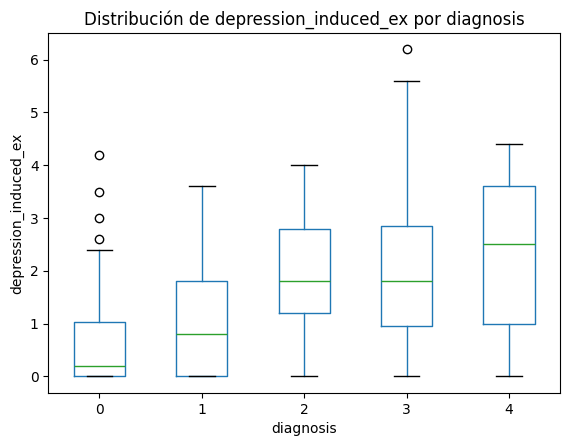

In [341]:
subset.boxplot(column='depression_induced_ex', by='diagnosis', grid=False)

plt.title('Distribución de depression_induced_ex por diagnosis')
plt.suptitle('')  
plt.xlabel('diagnosis')
plt.ylabel('depression_induced_ex')
plt.show() 

In [342]:
stats = subset.groupby('diagnosis')['depression_induced_ex'].describe()
print(stats)

           count      mean       std  min   25%  50%    75%  max
diagnosis                                                       
0          164.0  0.586585  0.781734  0.0  0.00  0.2  1.025  4.2
1           55.0  1.005455  0.993389  0.0  0.00  0.8  1.800  3.6
2           35.0  1.802857  1.167825  0.0  1.20  1.8  2.800  4.0
3           35.0  1.962857  1.522012  0.0  0.95  1.8  2.850  6.2
4           13.0  2.361538  1.367198  0.0  1.00  2.5  3.600  4.4


Las estadísticas muestran que la depresión inducida por el ejercicio aumenta a medida que el grupo de diagnóstico sube de 0 a 4. Los grupos con diagnósticos más altos (3 y 4) tienen valores promedio y desviaciones estándar más altos, indicando una mayor intensidad y variabilidad de la depresión inducida. En contraste, los grupos con diagnósticos más bajos (0 y 1) muestran menor intensidad y dispersión. Por lo tanto, hay una relación directamente proporcional entre el diagnóstico y la depresión inducida, con mayor severidad y variabilidad en los diagnósticos más altos.

#### Grupo Etáreo

<Axes: title={'center': 'Grupo etario'}, xlabel='age_group'>

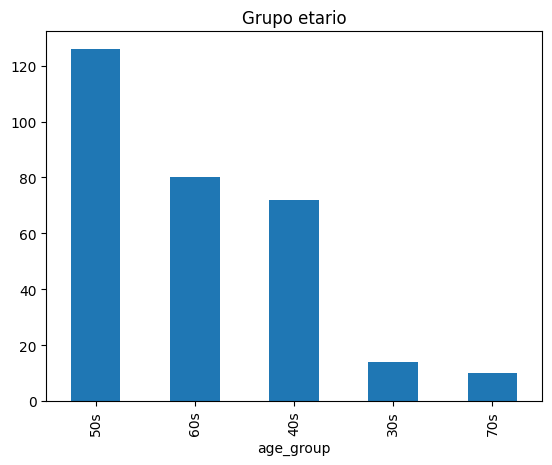

In [343]:
subset.age_group.value_counts().plot.bar(title='Grupo etario', )

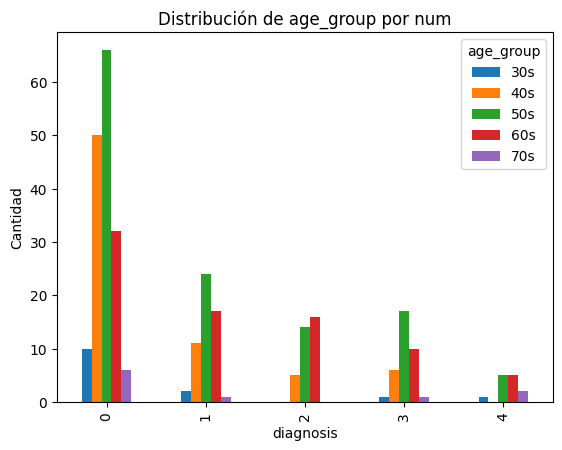

In [344]:
grouped_data = subset.groupby(['diagnosis', 'age_group']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', title='Distribución de age_group por num')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

In [345]:
subset.age_group.value_counts()

age_group
50s    126
60s     80
40s     72
30s     14
70s     10
Name: count, dtype: int64

A simple vista observamos que el grupo etáreo de los **50s** es aquel que más destaca entre los diferentes valores de diagnosis, al igual que aquel grupo que se encuentra entre los **60s**, esto es así porque hay más registros de estos.

**Porcentajes sobre el total de registros**
- **30s - 4.71%**
- **40s - 24.24%**
- **50s - 41.07%**
- **60s - 26.59%**
- **70s - 3.36%**

Con estos porcentajes observamos que los registros de las edades etarias se encuentra desbalanceados, siendo el grupo etáreo de 50s con el mayor porcentaje. 

#### cp - Tipo de dolor de pecho

<Axes: title={'center': 'Tipo de dolor de pecho'}, xlabel='chest_pain'>

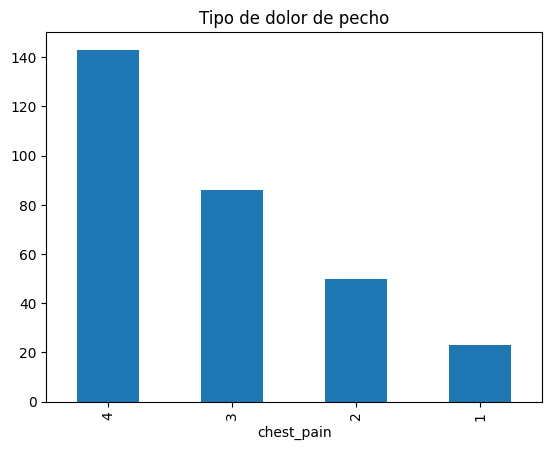

In [346]:
subset.chest_pain.value_counts().plot.bar(title='Tipo de dolor de pecho')

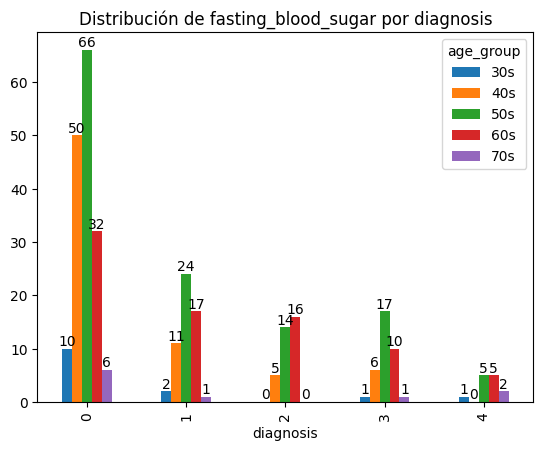

In [347]:
graph = grouped_data.plot(kind='bar', title='Distribución de fasting_blood_sugar por diagnosis')

## SI TENES la variable graph, no copies lo de arriba, solo lo de abajo

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

In [348]:
subset.chest_pain.value_counts()

chest_pain
4    143
3     86
2     50
1     23
Name: count, dtype: int64

A simple vista se puede observar que no importa el tipo de dolor de pecho para poder deducir si hay alguna enfermedad cardiaca. Se ve en el gráfico que aquellos pacientes asintomáticos (4) se encuentran distribuidos entre todas las variables del diagnosis. 

**Porcentaje de chest_pain**
- **4 - 46.80%**
- **3 - 28.95%**
- **2 - 16.83%**
- **1 - 7.40%**

#### fbs - Azúcar en sangre en ayunas > 120 mg/dl

<Axes: title={'center': 'Azúcar en sangre > 120ml/dl'}, xlabel='fasting_blood_sugar'>

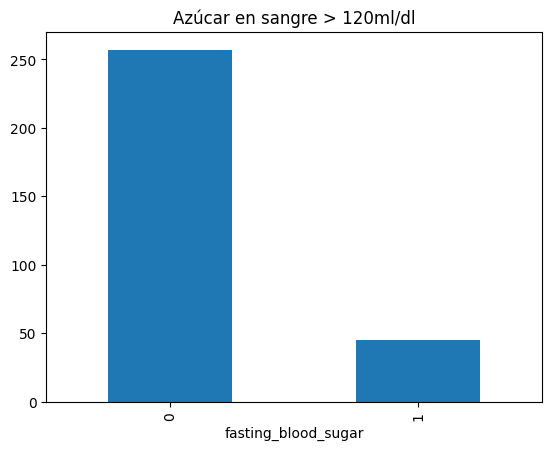

In [349]:
subset.fasting_blood_sugar.value_counts().plot.bar(title='Azúcar en sangre > 120ml/dl')

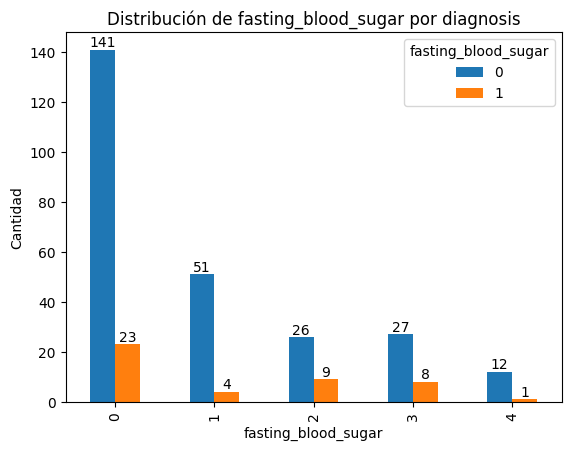

In [350]:
grouped_data = subset.groupby(['diagnosis', 'fasting_blood_sugar']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de fasting_blood_sugar por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('fasting_blood_sugar')
plt.ylabel('Cantidad')
plt.show()

In [351]:
subset.fasting_blood_sugar.value_counts()

fasting_blood_sugar
0    257
1     45
Name: count, dtype: int64

#### restecg

<Axes: title={'center': 'rest_ecg'}, xlabel='rest_ecg'>

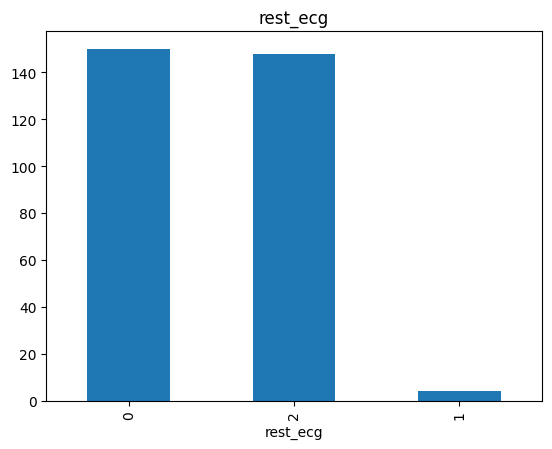

In [352]:
subset.rest_ecg.value_counts().plot.bar(title='rest_ecg')

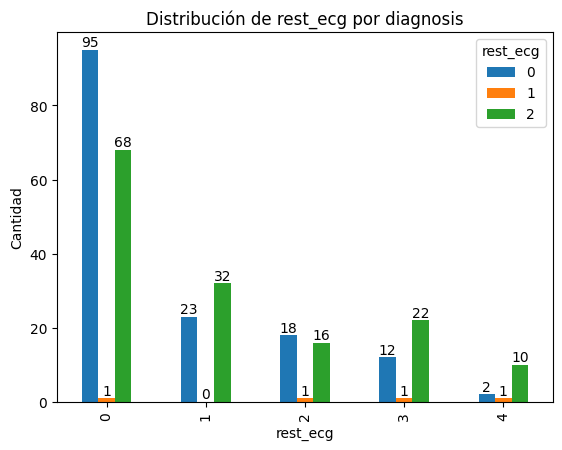

In [353]:
grouped_data = subset.groupby(['diagnosis', 'rest_ecg']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de rest_ecg por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('rest_ecg')
plt.ylabel('Cantidad')
plt.show()

Se observa que aumenta la gravedad de la enfermedad cardiaca (diagnosis) es mayor la hipertrofia ventricular izquierda probable o definitiva (rest_ecg - 2), esto nos dice que es más proble de contraer una enfermedad cardiaca grave. 

#### exang - angina inducida por el ejercicio

<Axes: title={'center': 'exang'}, xlabel='exercise_induced_angina'>

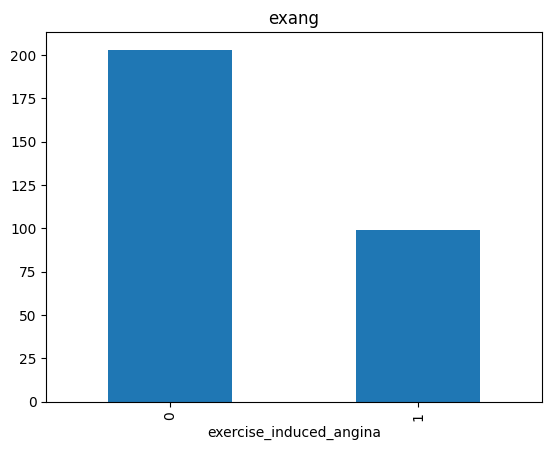

In [354]:
subset.exercise_induced_angina.value_counts().plot.bar(title='exang')

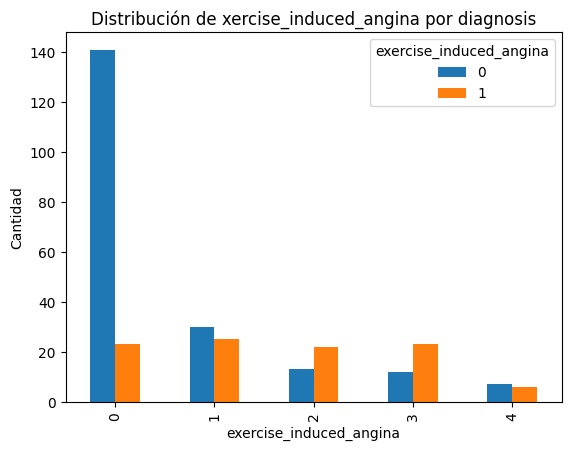

In [355]:
grouped_data = subset.groupby(['diagnosis', 'exercise_induced_angina']).size().unstack(fill_value=0)
grapf = grouped_data.plot(kind='bar', title='Distribución de xercise_induced_angina por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('exercise_induced_angina')
plt.ylabel('Cantidad')
plt.show()

#### slope

<Axes: title={'center': 'slope'}, xlabel='slope'>

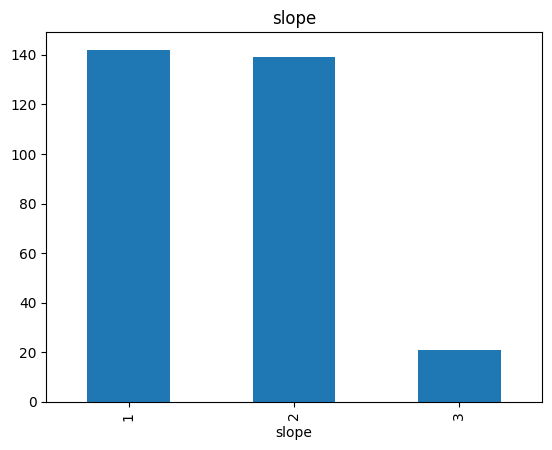

In [356]:
subset.slope.value_counts().plot.bar(title='slope')

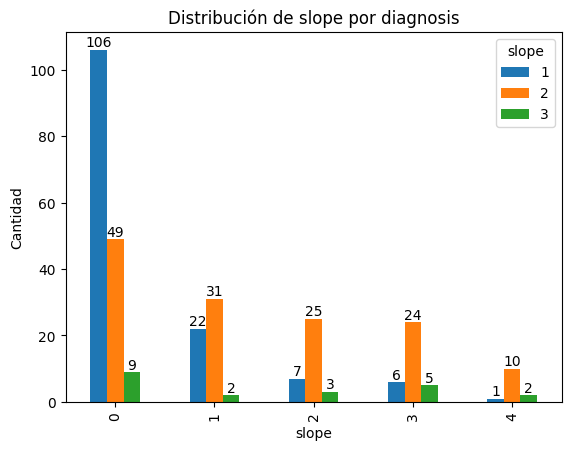

In [357]:
grouped_data = subset.groupby(['diagnosis', 'slope']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de slope por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('slope')
plt.ylabel('Cantidad')
plt.show()

Si recordamos, slope es la pendiente del segmento ST en el pico de ejercicio. Si es ascendente (valor 1) es el valor menos procupante a la hora de tener que indicar alguna enfermedad cardiaca, por lo contrario, el valor 3 si es preocupante porque indica que la pendiente es descendente, y el valor 2 es plano, lo cual es ligeramente preocupante. 

Podemos observar, de esta manera, que se corresponde con lo que nos indica el gráfico, ya que a medida que aumenta la gavedad de la enfermedad cardiaca, se muestra predominante el valor de ST plano.

Se puede observar correlación entre la pendiente ST y la gravedad de la enfermedad.

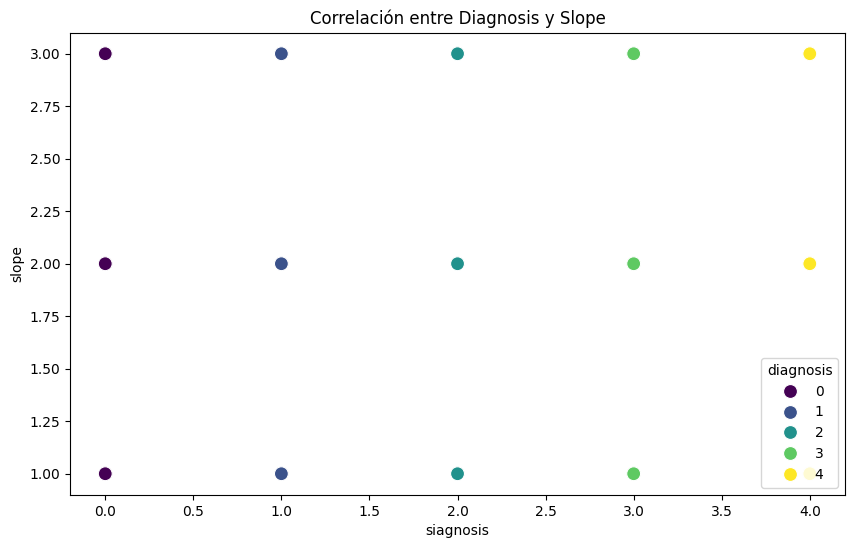

In [358]:
# INTENTANDO crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x='diagnosis', y='slope', hue='diagnosis', palette='viridis', s=100)
plt.xlabel('siagnosis')
plt.ylabel('slope')
plt.title('Correlación entre Diagnosis y Slope')
plt.show()

#### Vessels colored fl

In [359]:
subset.vessels_colored_fl.sample(10)

226    0.000000
259    0.000000
178    1.000000
302    0.674497
193    3.000000
127    1.000000
267    1.000000
191    3.000000
283    0.000000
58     1.000000
Name: vessels_colored_fl, dtype: float64

Aca tenemos un problema, el tipo de variable de 'ca' es float, pero los datos que almacena son enteros, con lo cual, seran transformados en int.

In [360]:
subset['vessels_colored_fl'] = subset['vessels_colored_fl'].astype(int)

<Axes: xlabel='vessels_colored_fl'>

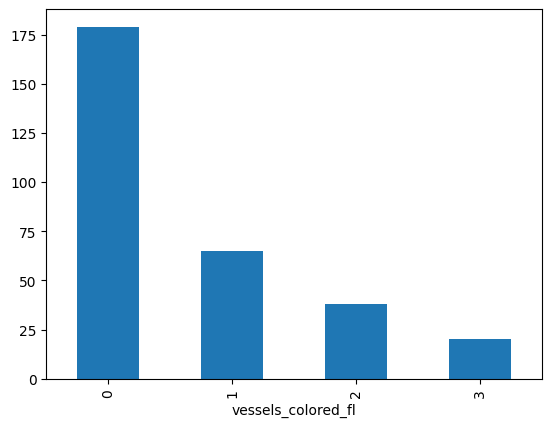

In [361]:
subset.vessels_colored_fl.value_counts().plot.bar()

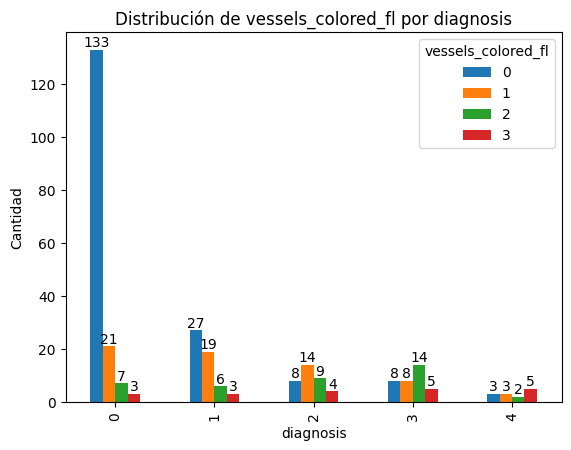

In [362]:
grouped_data = subset.groupby(['diagnosis', 'vessels_colored_fl']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de vessels_colored_fl por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

Ca es el número de vasos principales coloreados por fluroscopia, reflejando la cantidad de vasos afectados y la severidad de la obstruccion. Como podemos ver, aquellos que no poseen enfermedad cardiaca, son aquellos que no poseen vasos principales bloqueados. 

Para aclarar, la escala de 0 a 4 generalmente tiene el siguiente significado:

0: No hay vasos principales afectados; es decir, no se observa enfermedad coronaria significativa.
1: Un vaso principal está afectado.
2: Dos vasos principales están afectados.
3: Tres vasos principales están afectados.
4: Cuatro vasos principales están afectados, lo cual indica enfermedad coronaria extensa y severa.

A medida que aumenta la cantidad de vasos afectados, aumenta la gravedad de la enfermedad cardiaca,.

#### Thalassemia

Transformamos los valores continuos a enteros.

In [363]:
subset["thalassemia"] = subset["thalassemia"].astype(int)

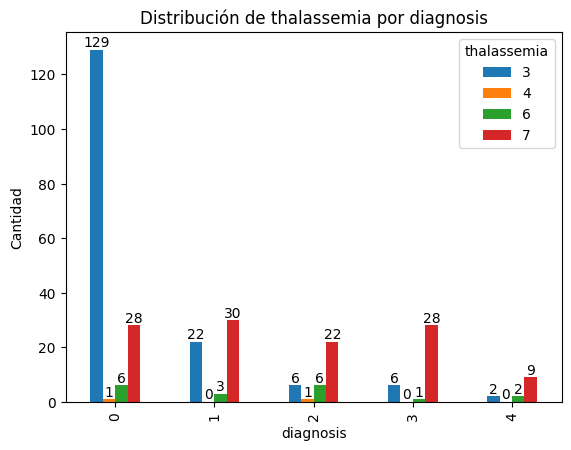

In [364]:
grouped_data = subset.groupby(['diagnosis', 'thalassemia']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de thalassemia por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

#### Max_heart_rate

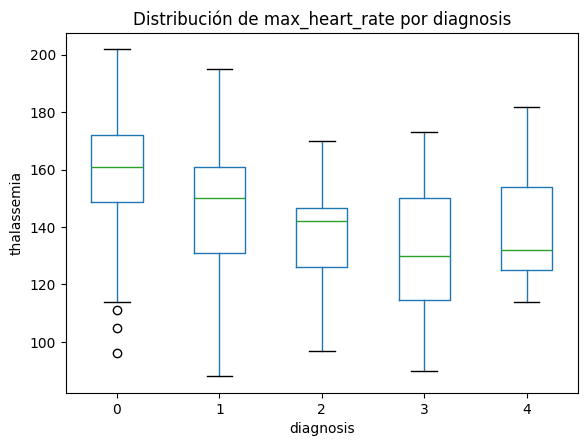

In [365]:
subset.boxplot(column='max_heart_rate', by='diagnosis', grid=False)

plt.title('Distribución de max_heart_rate por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('thalassemia')
plt.show()

#### Cholesterol_level

<Axes: xlabel='cholesterol_level'>

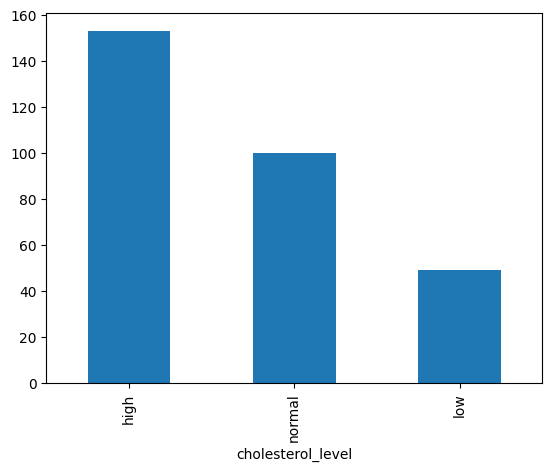

In [366]:
subset.cholesterol_level.value_counts().plot.bar()

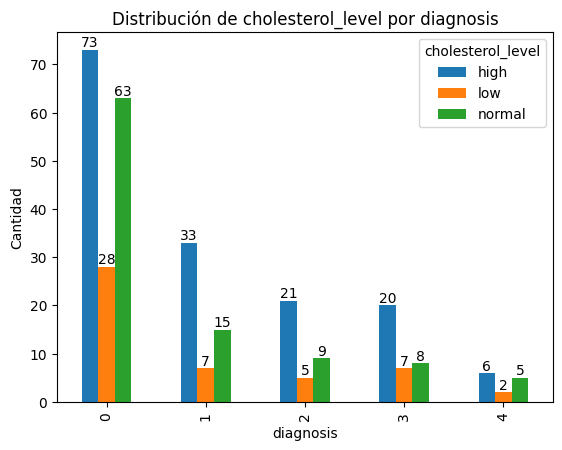

In [367]:
grouped_data = subset.groupby(['diagnosis', 'cholesterol_level']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de cholesterol_level por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

#### Blood_pressure_level

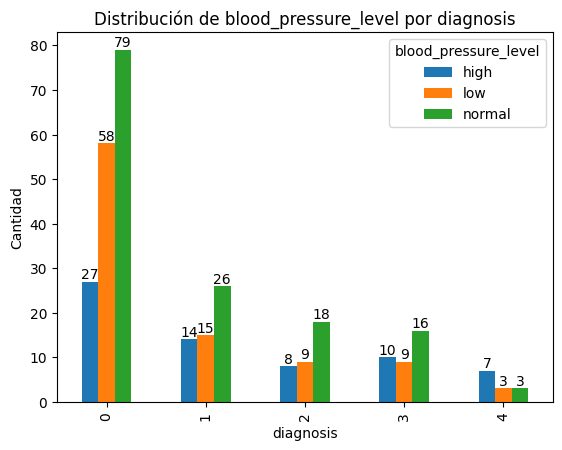

In [368]:
grouped_data = subset.groupby(['diagnosis', 'blood_pressure_level']).size().unstack(fill_value=0)
graph = grouped_data.plot(kind='bar', title='Distribución de blood_pressure_level por diagnosis')

for container in graph.containers:
    graph.bar_label(container, label_type='edge')

plt.xlabel('diagnosis')
plt.ylabel('Cantidad')
plt.show()

#### Risk_score

In [369]:
fig = px.box(subset, y='risk_score')
fig.show()

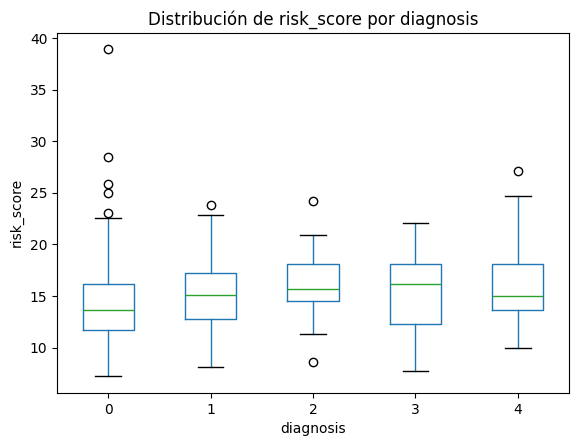

In [370]:
bxp = subset.boxplot(column='risk_score', by='diagnosis', grid=False)

plt.title('Distribución de risk_score por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('risk_score')
plt.show()

#### Risk_factor

In [371]:
fig = px.box(subset, y='risk_factor')
fig.show()

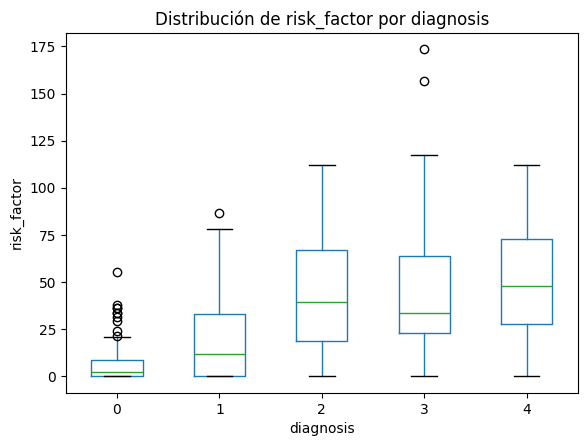

In [372]:
bxp = subset.boxplot(column='risk_factor', by='diagnosis', grid=False)

plt.title('Distribución de risk_factor por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('risk_factor')
plt.show()

#### Symptom_severity

In [373]:
fig = px.box(subset, y='symptom_severity')
fig.show()

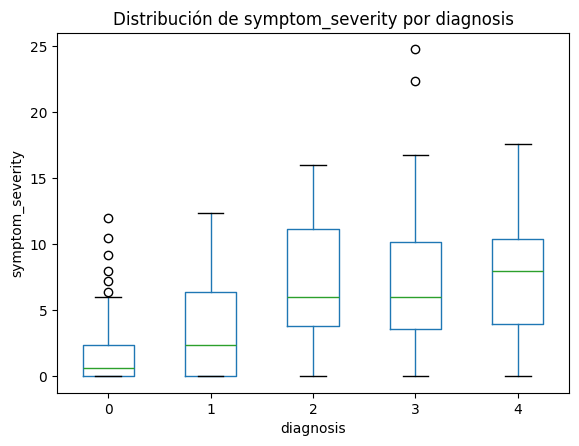

In [374]:
bxp = subset.boxplot(column='symptom_severity', by='diagnosis', grid=False)

plt.title('Distribución de symptom_severity por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('symptom_severity')
plt.show()

#### Avg_chol_by_age_group

In [375]:
fig = px.box(subset, y='avg_chol_by_age_group')
fig.show()

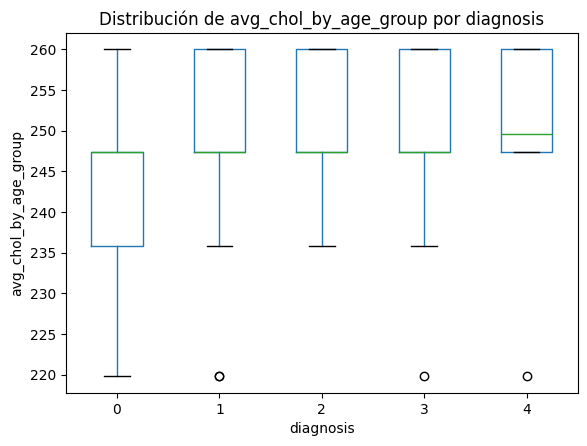

In [376]:
bxp = subset.boxplot(column='avg_chol_by_age_group', by='diagnosis', grid=False)

plt.title('Distribución de avg_chol_by_age_group por diagnosis')
plt.suptitle('')
plt.xlabel('diagnosis')
plt.ylabel('avg_chol_by_age_group')
plt.show()

Dividimos el conjunto de datos en train, validation y test

In [377]:
from sklearn.model_selection import train_test_split

train, not_train = train_test_split(subset, test_size=0.4, random_state=42)
validation, test = train_test_split(not_train, test_size=0.5, random_state=42)

train.shape, validation.shape, test.shape

((181, 18), (60, 18), (61, 18))

Generamos nuestro mapper

In [378]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, OneHotEncoder

mapper = DataFrameMapper([
    (['sex'], [OneHotEncoder()]),
    (['chest_pain'], [StandardScaler()]),
    (['fasting_blood_sugar'], [OneHotEncoder()]),
    (['rest_ecg'], [StandardScaler()]),
    (['max_heart_rate'], [StandardScaler()]),
    (['exercise_induced_angina'], [OneHotEncoder()]),
    (['depression_induced_ex'], [StandardScaler()]),
    (['slope'], [StandardScaler()]),
    (['vessels_colored_fl'], [StandardScaler()]),
    (['thalassemia'], [StandardScaler()]),
    (['age_group'], [OneHotEncoder()]),
    (['cholesterol_level'], [OneHotEncoder()]),
    (['blood_pressure_level'], [OneHotEncoder()]),
    (['risk_score'], [StandardScaler()]),
    (['symptom_severity'], [StandardScaler()]),
    (['risk_factor'], [StandardScaler()]),
    (['avg_chol_by_age_group'], [StandardScaler()])
])

mapper.fit(train)

/home/marcos/Documentos/TP_ML_Bellotti_Lopez_Trinchieri/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



DataFrameMapper(drop_cols=[],
                features=[(['sex'], [OneHotEncoder()]),
                          (['chest_pain'], [StandardScaler()]),
                          (['fasting_blood_sugar'], [OneHotEncoder()]),
                          (['rest_ecg'], [StandardScaler()]),
                          (['max_heart_rate'], [StandardScaler()]),
                          (['exercise_induced_angina'], [OneHotEncoder()]),
                          (['depression_induced_ex'], [StandardScaler()]),
                          (['slope'], [StandardScaler()]),
                          (['...red_fl'], [StandardScaler()]),
                          (['thalassemia'], [StandardScaler()]),
                          (['age_group'], [OneHotEncoder()]),
                          (['cholesterol_level'], [OneHotEncoder()]),
                          (['blood_pressure_level'], [OneHotEncoder()]),
                          (['risk_score'], [StandardScaler()]),
                          (['symptom_severity'], [StandardScaler()]),
                          (['risk_factor'], [StandardScaler()]),
                          (['avg_chol_by_age_group'], [StandardScaler()])])

Vemos como realiza las transformaciones

In [379]:
sample = subset.sample(5, random_state=42)

mapper.transform(sample)

array([[ 0.        ,  1.        , -0.09486997,  0.        ,  1.        ,
         1.00277393,  1.026384  ,  1.        ,  0.        , -0.8136304 ,
        -0.92371117,  2.62321944, -0.88270886,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        , -0.10576131,
        -0.71630829, -0.62636242,  0.0651326 ],
       [ 0.        ,  1.        ,  0.91521619,  1.        ,  0.        ,
         1.00277393, -2.12235336,  0.        ,  1.        , -0.8136304 ,
         0.74820605,  0.4148347 , -0.88270886,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        , -0.6473259 ,
        -0.71630829, -0.62636242,  0.0651326 ],
       [ 0.        ,  1.        ,  0.91521619,  0.        ,  1.        ,
         1.00277393, -0.37843728,  0.        ,  1.        ,  0.19504838,
         0.74820605,  0.4148

In [380]:
mapper.transformed_names_

['sex_0',
 'sex_1',
 'chest_pain',
 'fasting_blood_sugar_0',
 'fasting_blood_sugar_1',
 'rest_ecg',
 'max_heart_rate',
 'exercise_induced_angina_0',
 'exercise_induced_angina_1',
 'depression_induced_ex',
 'slope',
 'vessels_colored_fl',
 'thalassemia',
 'age_group_0',
 'age_group_1',
 'age_group_2',
 'age_group_3',
 'age_group_4',
 'cholesterol_level_0',
 'cholesterol_level_1',
 'cholesterol_level_2',
 'blood_pressure_level_0',
 'blood_pressure_level_1',
 'blood_pressure_level_2',
 'risk_score',
 'symptom_severity',
 'risk_factor',
 'avg_chol_by_age_group']

Generamos el Pipeline

In [381]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

pipeLR = Pipeline([
    ('mapper', mapper),
    ('classifier', LogisticRegression(random_state=42))
])
# Lo entrenamos con train
pipeLR.fit(train, train.diagnosis)

y_predLR = pipeLR.predict(validation)

y_predLR

/home/marcos/Documentos/TP_ML_Bellotti_Lopez_Trinchieri/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([1, 0, 4, 0, 0, 3, 3, 3, 3, 2, 0, 3, 1, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 2, 3, 1, 0, 3, 1, 0, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 3, 0,
       0, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 2, 3, 2, 0, 3])

Ahora se evaluarán las metricas

In [382]:
from sklearn import metrics

print(metrics.classification_report(validation.diagnosis, y_predLR))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.25      0.13      0.17        15
           2       0.33      0.22      0.27         9
           3       0.23      0.43      0.30         7
           4       0.00      0.00      0.00         1

    accuracy                           0.55        60
   macro avg       0.33      0.34      0.32        60
weighted avg       0.52      0.55      0.52        60



Claramente no parece ser un problema para resolver con logisitc regression.

Probaremos con k-NN

In [383]:
from sklearn.neighbors import KNeighborsClassifier

K = 10

pipeKNN = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K))
])
# Lo entrenamos con train
pipeKNN.fit(train, train.diagnosis)

y_predKNN = pipeKNN.predict(validation)

y_predKNN

/home/marcos/Documentos/TP_ML_Bellotti_Lopez_Trinchieri/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([0, 0, 2, 0, 0, 3, 3, 0, 1, 1, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2])

In [384]:
print(metrics.classification_report(validation.diagnosis, y_predKNN))

/home/marcos/Documentos/TP_ML_Bellotti_Lopez_Trinchieri/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/marcos/Documentos/TP_ML_Bellotti_Lopez_Trinchieri/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/marcos/Documentos/TP_ML_Bellotti_Lopez_Trinchieri/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.68      1.00      0.81        28
           1       0.50      0.13      0.21        15
           2       0.36      0.44      0.40         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.57        60
   macro avg       0.31      0.32      0.28        60
weighted avg       0.50      0.57      0.49        60



Modificaremos el valor devuelto por 'diagnosis', de manera que tendremos solo dos resultados posibles [0,1]
0: sin enfermedad
1: con enfermedad

Realiazamos la sepracion de los datos

Generamos la nueva Pipeline con LogisticRegression y k-NN para comparar

In [385]:
pipeLR = Pipeline([
    ('mapper', mapper),
    ('classifier', LogisticRegression(random_state=42))
])
# Lo entrenamos con train
pipeLR.fit(train, train.diagnosis)

y_predLR_train = pipeLR.predict(train)
y_predLR_validation = pipeLR.predict(validation)

y_predLR_validation

/home/marcos/Documentos/TP_ML_Bellotti_Lopez_Trinchieri/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7



array([1, 0, 4, 0, 0, 3, 3, 3, 3, 2, 0, 3, 1, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 2, 3, 1, 0, 3, 1, 0, 0, 2, 0, 3, 0, 0, 0, 1, 0, 0, 3, 0,
       0, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 2, 3, 2, 0, 3])

Evaluamos las metricas

In [386]:
print(metrics.classification_report(validation.diagnosis, y_predLR_validation))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.25      0.13      0.17        15
           2       0.33      0.22      0.27         9
           3       0.23      0.43      0.30         7
           4       0.00      0.00      0.00         1

    accuracy                           0.55        60
   macro avg       0.33      0.34      0.32        60
weighted avg       0.52      0.55      0.52        60



ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (2).

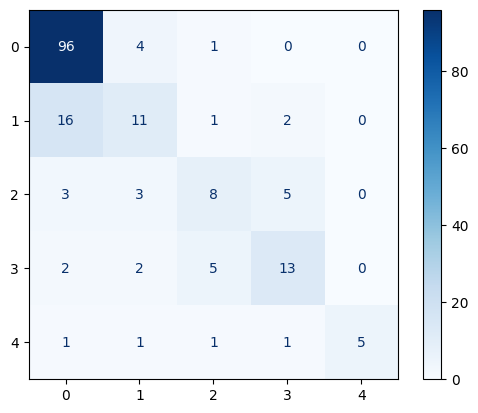

In [387]:
cm = metrics.confusion_matrix(train.diagnosis, y_predLR_train)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('train')

In [ ]:
cm = metrics.confusion_matrix(validation.diagnosis, y_predLR_validation)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('validation')

Con los datos de 'diagnosis' modificados, las predicciones son mas precisas.

In [ ]:
K = 10

pipeKNN = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K))
])
# Lo entrenamos con train
pipeKNN.fit(train, train.diagnosis)

y_predKNN_train = pipeKNN.predict(train)
y_predKNN_validation = pipeKNN.predict(validation)

y_predKNN_validation

In [ ]:
print(metrics.classification_report(validation.diagnosis, y_predKNN_validation))

In [ ]:
cm = metrics.confusion_matrix(train.diagnosis, y_predKNN_train)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('train')

In [ ]:
cm = metrics.confusion_matrix(validation.diagnosis, y_predKNN_validation)
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                        display_labels=['no disease', 'disease'])
cm_plot.plot(cmap="Blues")
cm_plot.ax_.set_title('validation')

Con un KNN con k=10 vemos que es pero que Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier(n_neighbors=1)
parameters = {'n_neighbors': [1, 3, 5, 10, 15, 20, 50, 100]}

clf = GridSearchCV(knn_clf, parameters, refit=True, verbose=1)

gs_pipe = Pipeline([
    ('mapper', mapper),
    ('classifier', clf),
])

gs_pipe.fit(train, train.diagnosis)

clf.best_score_, clf.best_params_

In [ ]:
K=15

pipeKNN = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K))
])

pipeKNN.fit(train, train.diagnosis)

kNN_train = pipeKNN.predict(train)
kNN_validation = pipeKNN.predict(validation)

kNN_validation

In [ ]:
print(metrics.classification_report(validation.diagnosis, kNN_validation))

Una vez evaluado el modelo con Logistic Regression y con k-NN con un k=15 vemos que el Logistic Regression tiene una mayor acuracy [LogisticRegression: 83, k-NN: 78]

### Listado de posibles dudas/preguntas al encargado de proveer los datos

1. ¿Que tan fiable son los datos?
2. ¿Por qué hay tantos outliners en las siguientes variables risk_score, risk_factor, symptom_severity y avg_chol_by_age_group? 
3. En el caso de la depresión inducida por el ejercicio, nos encontramos con 3 valores aberrantes ¿Qué tan relevantes son los mismos a la hora de estudiar la gravedad de la enfermedad del corazón?

## 3- Hipótesis sobre los datos

### a. Formulación de hipótesis sobre la variable target bajo determinadas condiciones

1. En la variable **chest_pain** se piensa que esta puede no influir a la hora de predecir si hay o no alguna enfermedad cardiaca.
2. En la variable **fasting_blood_sugar** se piensa que puede no influir a la hora de predecir si hay o no alguna enfermedad cardiaca. No se termina de saber si al ser true nos asegure que pueda haber algun tipo de enfemerdad cardiaca. 

### b. Comprobación de la hipótesis

### c. Creación de nuevas variables